# SS4101 Project

In [18]:
#importing
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
from matplotlib import style
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
plt.rcParams.update({'font.size': 12})

In [3]:
dr14 = pd.read_csv('dr14.csv', skiprows=0)
dr15 = pd.read_csv('dr15.csv', skiprows=0)
dr16 = pd.read_csv('dr16.csv', skiprows=0)

dr = pd.concat([dr15,dr14])

## EXPLORING THE DATA

In [4]:
dr.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237649e+18,152.354824,-0.129744,19.49632,17.59388,16.67482,16.25166,15.95042,756,301,3,244,3.040557e+17,GALAXY,0.095048,270,51909,228
1,1.237649e+18,152.289487,-0.063071,19.45274,17.62178,16.68552,16.27155,15.92060,756,301,3,244,3.041123e+17,GALAXY,0.095463,270,51909,434
2,1.237649e+18,152.381682,-0.040947,18.45212,16.89779,16.04317,15.65277,15.35365,756,301,3,244,3.041140e+17,GALAXY,0.095887,270,51909,440
3,1.237649e+18,152.388011,-0.009529,19.30342,17.38579,16.42225,15.99919,15.64936,756,301,3,244,3.041090e+17,GALAXY,0.096564,270,51909,422
4,1.237649e+18,152.408919,-0.159743,19.27068,18.52680,18.12876,17.75474,17.72392,756,301,3,244,3.040546e+17,GALAXY,0.137550,270,51909,224


dr will be our training dataset and dr16 will be our test dataset

In [5]:
dr.describe()  #Generate descriptive statistics of the dataframe
#dr16 contains 100000 objects while dr14 & dr15 consist of 10000 objects.

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.00000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.237650e+18,171.840789,16.163274,18.628606,17.377191,16.843009,16.582462,16.420090,1035.434350,301.0,3.61260,291.127300,1.640004e+18,0.148730,1456.530000,52933.096500,351.764650
std,9.896211e+11,48.014533,25.711136,0.822021,0.944800,1.069495,1.143177,1.210852,305.072059,0.0,1.66071,159.746295,2.025434e+18,0.395147,1798.933988,1500.097568,205.360579
min,1.237646e+18,8.235100,-8.479532,12.988970,12.565210,11.629170,11.186280,10.874560,94.000000,301.0,1.00000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,151.301233,-0.463345,18.190347,16.825817,16.181415,15.855960,15.617965,756.000000,301.0,2.00000,171.000000,3.524838e+17,0.000121,313.000000,51908.000000,187.000000
50%,1.237650e+18,174.102955,0.624408,18.862705,17.496600,16.853640,16.549470,16.378900,1035.000000,301.0,4.00000,286.000000,5.315815e+17,0.046364,472.000000,52000.000000,347.000000
75%,1.237651e+18,199.514506,45.729393,19.261320,18.012950,17.510675,17.253030,17.132850,1345.000000,301.0,5.00000,382.000000,2.881248e+18,0.094373,2559.000000,54213.000000,507.000000
max,1.237652e+18,348.902530,68.542265,19.599900,19.918970,24.802040,28.179630,22.959940,1462.000000,301.0,6.00000,784.000000,9.468834e+18,5.353854,8410.000000,57481.000000,1000.000000


* The count row for each dataset for every feature is 10000. This means that there are no missing values.
* Maximum and minimum value of ra is ~360 and ~0, but for dec it is -19.5 to 85, therefore we can infer that observations are mostly taken of the Northern part of the sky.

In [6]:
print('data release 14')
print(dr14['class'].value_counts())  #counts of the different classes present in the 'class' column. 
print('data release 15')
print(dr15['class'].value_counts()) 
print('data release 16')
print(dr16['class'].value_counts()) 

data release 14
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64
data release 15
GALAXY    5386
STAR      3713
QSO        901
Name: class, dtype: int64
data release 16
GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64


<IPython.core.display.Javascript object>


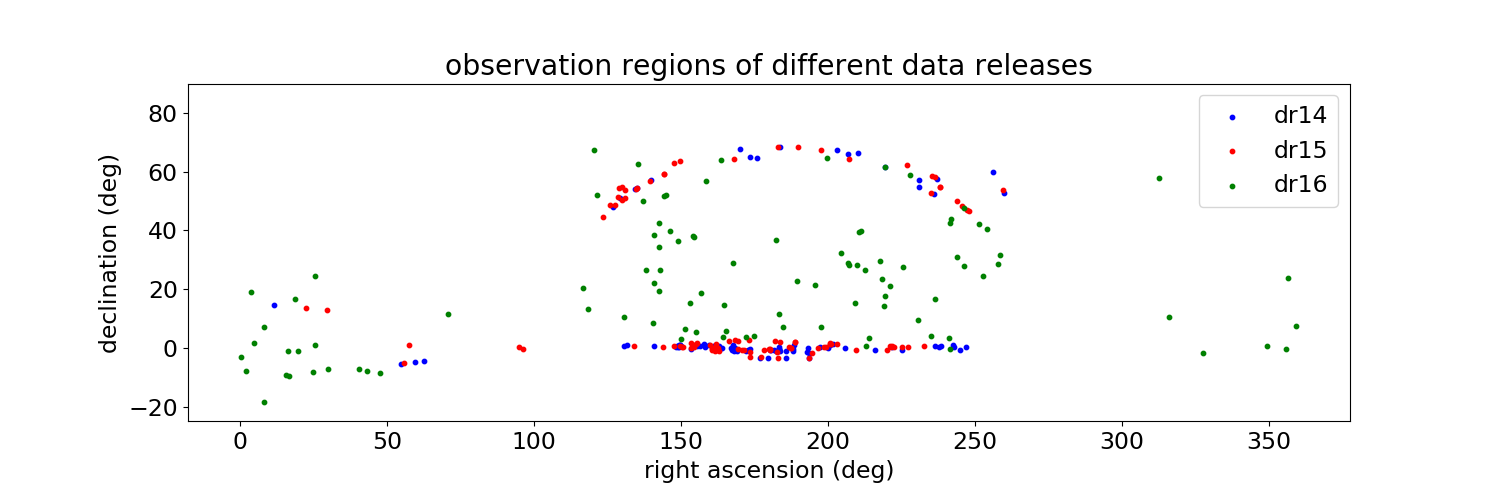

In [7]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 17})
for i in range(3):
    if i==0 : data,c=dr14.sample(n=100),'b'
    elif i==1 : data,c=dr15.sample(n=100),'r'
    elif i==2 : data,c=dr16.sample(n=100),'g'
    theta, phi= data['ra'],data['dec']
    plt.scatter(theta,phi,color=c,s=10,label=str('dr'+str(14+i)))
plt.legend()
plt.ylim(-25,90)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("observation regions of different data releases")
plt.ylabel("declination (deg)")
plt.xlabel("right ascension (deg)")
plt.show()

## Analysis using Machine Learning Models
The columns objid, specobjid, run, rerun, camcol and field will have no correlation with our target i.e the class of the object. Hence these columns will be dropped.
Next, we will Scale all values to be within the (0, 1) interval so that all features contribute proportionately.

In [8]:
dr.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid','mjd','plate','fiberid','dec','ra'], axis=1, inplace=True)
dr16.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid','mjd','plate','fiberid','dec','ra'], axis=1, inplace=True)

scaler = MinMaxScaler()
scaled_dr = scaler.fit_transform(dr.drop('class', axis=1))
scaled_dr16 = scaler.transform(dr16.drop('class',axis=1))
X_train,y_train,X_test,y_test = scaled_dr,dr['class'],scaled_dr16,dr16['class']

We will impletement 3 types of ML algorithms :
* K Nearest Neighbors
* Naive Bayes
* Random Forest

## Dummy Classifier
Dummy classifiers are used to provide a baseline to our future Models.

In [9]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
preds=dummy.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Dummy Classifiers prediction accuracy : %3.2f" % (acc_knn))

Dummy Classifiers prediction accuracy : 42.50


### K Nearest Neighbours

In [10]:
knn = KNeighborsClassifier(10)
start_time1= time.perf_counter()
knn.fit(X_train, y_train)
end_time1= time.perf_counter()
start_time2 = time.perf_counter()
preds = knn.predict(X_test)
end_time2= time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
train_time_knn=end_time1-start_time1
prediction_time_knn = end_time2-start_time2
print("KNN-10 prediction accuracy : %3.2f" % (acc_knn))
print("training time : %4.3f seconds" % (train_time_knn))
print("prediction time : %6.5f seconds" % (prediction_time_knn))

KNN-10 prediction accuracy : 93.97
training time : 0.110 seconds
prediction time : 14.18008 seconds


### Naive Bayes

In [11]:
from sklearn.preprocessing import MaxAbsScaler
scaler_nb = MaxAbsScaler()  #since NB works on normally distributed data
scaled_dr_nb = scaler_nb.fit_transform(dr.drop('class', axis=1))
scaled_dr16_nb = scaler_nb.transform(dr16.drop('class',axis=1))
X_train_nb,X_test_nb= scaled_dr_nb,scaled_dr16_nb
gnb = GaussianNB()
start_time1= time.perf_counter()
gnb.fit(X_train_nb, y_train)
end_time1= time.perf_counter()
start_time2 = time.perf_counter()
preds = gnb.predict(X_test_nb)
end_time2= time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
train_time_gnb=end_time1-start_time1
prediction_time_gnb = end_time2-start_time2
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (train_time_gnb))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time_gnb))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 97.56
Time consumed for training: 0.084 seconds
Time consumed for prediction: 0.06661 seconds


### Random Forest Classifier

In [12]:
rfc = RandomForestClassifier(n_estimators=100)
start_time1= time.perf_counter()
rfc.fit(X_train, y_train)
end_time1= time.perf_counter()
start_time2 = time.perf_counter()
preds = rfc.predict(X_test)
end_time2= time.perf_counter()
acc_rfc= (preds == y_test).sum().astype(float) / len(preds)*100
train_time_rfc=end_time1-start_time1
prediction_time_rfc = end_time2-start_time2
print("Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (train_time_rfc))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time_rfc))

Random Forest Classifier's prediction accuracy is: 98.66
Time consumed for training: 10.528 seconds
Time consumed for prediction: 3.49637 seconds


### Visualizing the gaussian distributions of the NB Classifier

<IPython.core.display.Javascript object>


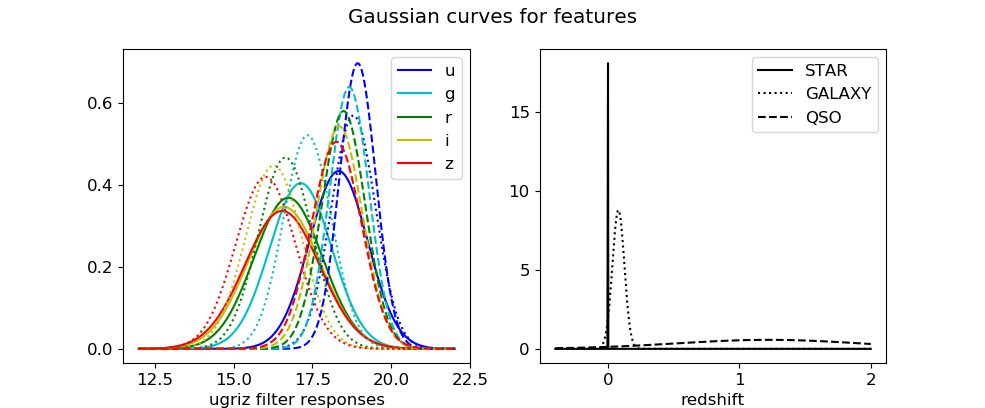

STAR u           18.331686
g           17.130518
r           16.735995
i           16.600049
z           16.541138
redshift     0.000050
Name: mean, dtype: float64 u           0.920298
g           0.987465
r           1.082970
i           1.152573
z           1.186156
redshift    0.000407
Name: std, dtype: float64
GALAXY u           18.801782
g           17.346249
r           16.646752
i           16.271072
z           16.017283
redshift     0.080167
Name: mean, dtype: float64 u           0.701497
g           0.765930
r           0.855438
i           0.892037
z           0.951636
redshift    0.045479
Name: std, dtype: float64
QSO u           18.935301
g           18.668680
r           18.487552
i           18.350105
z           18.265147
redshift     1.223159
Name: mean, dtype: float64 u           0.572888
g           0.625058
r           0.688066
i           0.735452
z           0.790497
redshift    0.699862
Name: std, dtype: float64


In [19]:

import scipy.stats as stats
x=np.linspace(12,22,1000)
xx=np.linspace(-0.4,2,1000)
fig, (ax1, ax2) = plt.subplots(1, 2)
color={'u':'b','g':'c','r':'g','i':'y','z':'r'}
line={'STAR':'solid','GALAXY':'dotted','QSO':'dashed'}
for class_ in ['STAR','GALAXY','QSO']:
    dr_class_des=dr[dr["class"]==class_].describe()
    means=dr_class_des.loc['mean']
    stds=dr_class_des.loc['std']
    for filter_ in ['u','g','r','i','z','redshift']:
        if filter_=='redshift': ax2.plot(xx, stats.norm.pdf(xx, means[filter_], stds[filter_]),linestyle=line[class_],color='k',label=class_)
        elif class_=='STAR': ax1.plot(x, stats.norm.pdf(x, means[filter_], stds[filter_]),linestyle=line[class_],color=color[filter_],label=filter_)
        else :ax1.plot(x, stats.norm.pdf(x, means[filter_], stds[filter_]),linestyle=line[class_],color=color[filter_])
    print(class_,means,stds)
fig.suptitle('Gaussian curves for features')
ax2.set(xlabel='redshift')
ax1.set(xlabel="ugriz filter responses")
ax2.grid()
ax1.legend()
ax2.legend()
#ax2.ylim(0,5)
plt.grid()

plt.show()
plt.savefig("ahf.png")

### Plotting the decision regions

<IPython.core.display.Javascript object>


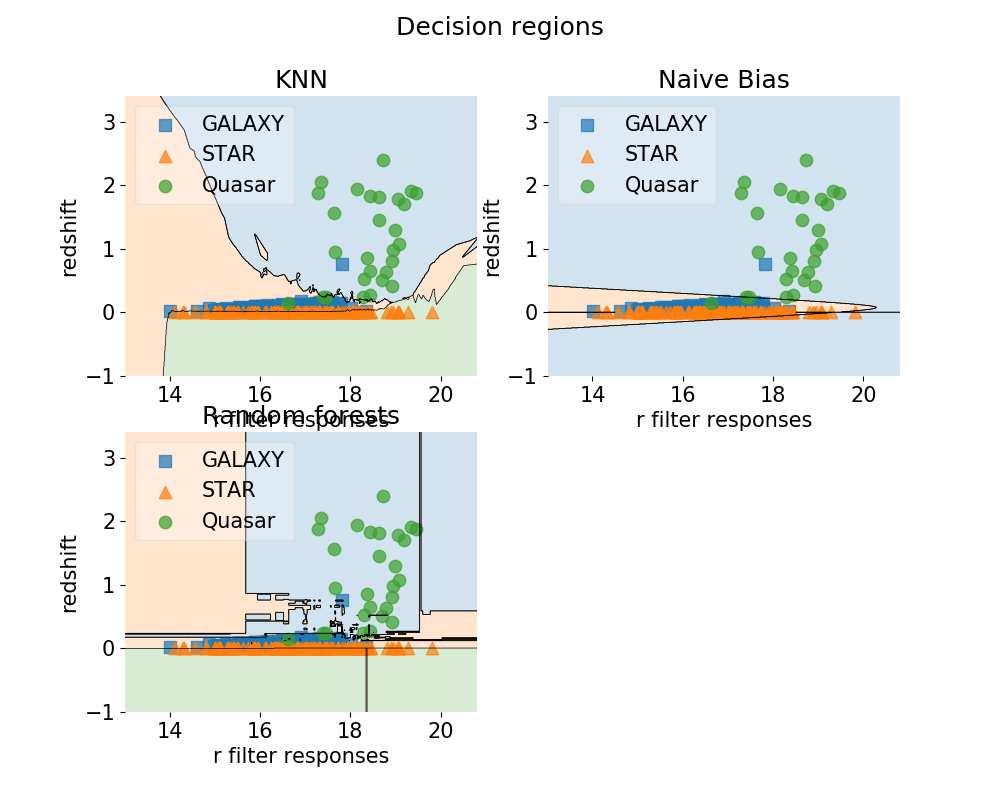

In [27]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
#gs = gridspec.GridSpec(2, 2)

knn = KNeighborsClassifier(10)
gnb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=10)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 15})
X,y=dr[['r','redshift']].values,dr['class'].replace({'GALAXY': 1, 'STAR': 2, 'QSO':3}).values
dr_sample=dr.sample(n=300)
X1,y1=dr_sample[['r','redshift']].values,dr_sample['class'].replace({'GALAXY': 1, 'STAR': 2, 'QSO':3}).values
labels = ['KNN', 'Naive Bias', 'Random forests']
knn.fit(X, y)
scatter_kwargs = {'s': 80, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
fig.suptitle('Decision regions')
for clf, lab, grd in zip([knn,gnb,rfc],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1, clf=clf, legend=2 if clf==knn else 0,scatter_kwargs=scatter_kwargs,contourf_kwargs=contourf_kwargs)
    plt.title(lab)
    plt.xlabel('r filter responses')
    plt.ylabel('redshift')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['GALAXY', 'STAR', 'Quasar'], framealpha=0.3, scatterpoints=1)

plt.show()

### Visualising Decision trees

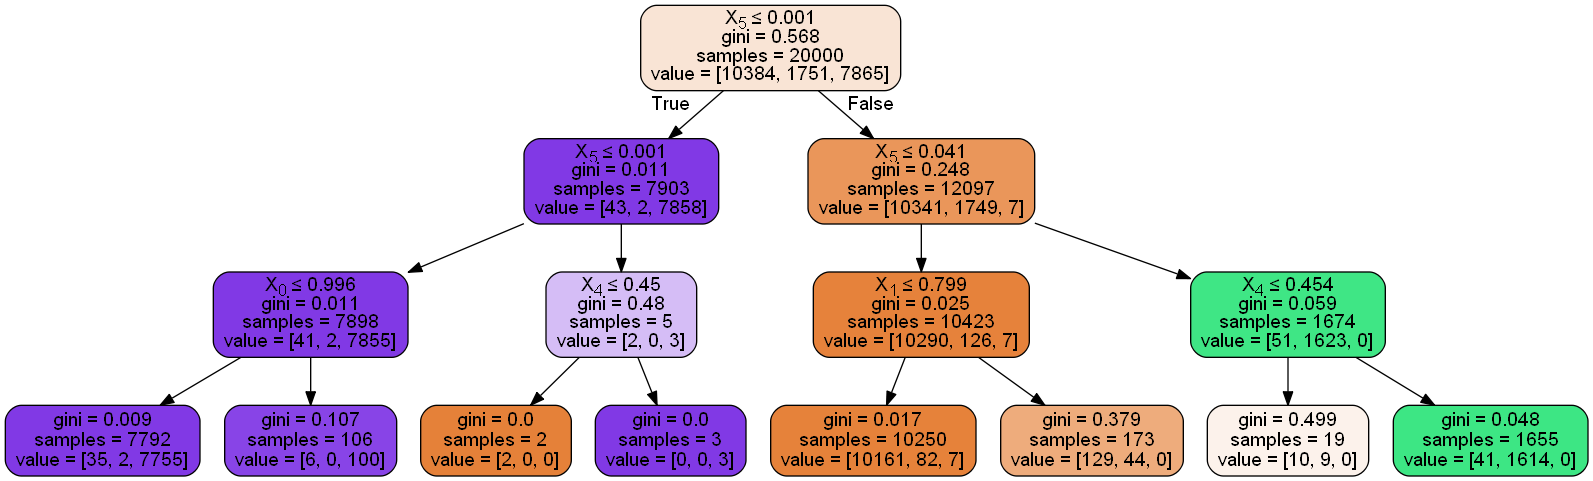

In [24]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
preds = dtree.predict(X_test)
acc_rfc= (preds == y_test).sum().astype(float) / len(preds)*100
print("Decision tree accuracy-",acc_rfc)

Decision tree accuracy- 98.336
